## Mục lục
* [1. Cài đặt các thư viện cần thiết](#chapter1) 
* [2. Nhập dữ liệu từ file](#chapter2) 
* [3. Khám phá dữ liệu](#chapter3) 
    * [3.1. Mức độ cơ bản](#section_3_1) 
    * [3.2. Các câu hỏi tự đặt ra](#section_3_2) 
* [4. Tiền xử lí dữ liệu](#chapter4) 
    * [4.1. Kiểm tra các dòng trùng lắp](#section_4_1) 
    * [4.2. Kiểm tra thông số chung của mỗi thuộc tính](#section_4_2) 

# 1. Cài đặt các thư viện cần thiết <a class="anchor" id="chapter1"></a>

In [4]:
import matplotlib.pyplot as plt
import requests
import pandas as pd

# 2. Nhập dữ liệu từ file <a class="anchor" id="chapter2"></a>

In [5]:
df = pd.read_csv('../data/weather_data_combined.csv')

# 3. Khám phá dữ liệu <a class="anchor" id="chapter3"></a>

## 3.1. Mức độ cơ bản <a class="anchor" id="section_3_1"></a>

### Câu 1. Có bao nhiêu cột và dòng trong dữ liệu của nhóm?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16900 entries, 0 to 16899
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            16900 non-null  int64  
 1   Temperature          16900 non-null  float64
 2   Feels Like           16900 non-null  float64
 3   Temp Min             16900 non-null  float64
 4   Temp Max             16900 non-null  float64
 5   Pressure             16900 non-null  int64  
 6   Humidity             16900 non-null  int64  
 7   Weather Description  16900 non-null  object 
 8   Wind Speed           16900 non-null  float64
 9   Wind Degree          16900 non-null  int64  
 10  City                 16900 non-null  object 
dtypes: float64(5), int64(4), object(2)
memory usage: 1.4+ MB


**Trả lời:** Theo như chúng ta thấy từ thông tin bảng, dữ liệu của nhóm gồm 11 cột và 16900 dòng

### Câu 2. Ý nghĩa của từng cột, dòng? Kiểu dữ liệu của mỗi cột?

- Ý nghĩa của từng dòng dữ liệt: các thông số được ghi tại một thời gian, địa điểm cụ thể.
- Ý nghĩa, kiểu dữ liệu của từng cột dữ liệu:
| Cột| Kiểu Dữ Liệu | Ý Nghĩa|
|:----------------------|:-------------|:-----------------|
| Timestamp           | int64        | Thời điểm ghi dữ liệu, mặc định là kiểu dt.|
| Temperature         | float64      | Nhiệt độ hiện tại, đơn vị được tính là Kelvin|
| Feels Like          | float64      | Nhiệt độ cảm nhận được, tính theo cảm giác của con người đối với thời tiết.|
| Temp Min            | float64      | Nhiệt độ thấp nhất trong khoảng thời gian 1 giờ và địa điểm cụ thể.|
| Temp Max            | float64      | Nhiệt độ cao nhất trong khoảng thời gian 1 giờ và địa điểm cụ thể.|
| Pressure            | int64        | Áp suất không khí tại mực nước biển, đơn vị là hPa.|
| Humidity            | int64        | Độ ẩm tương đối, được đo bằng phần trăm (%).|
| Weather Description | object       | Mô tả về tình trạng thời tiết, được biểu diễn dưới dạng văn bản.|
| Wind Speed          | float64      | Tốc độ gió, đơn vị được tính là mét/giây|
| Wind Degree         | int64        | Hướng gió, được đo bằng độ (meteorological degrees).|
| City                | object       | Tên thành phố hoặc địa điểm nơi dữ liệu thời tiết được ghi.|

### Câu 3. Các kiểu dữ liệu này có phù hợp với các cột không?

Có các kiểu dữ liệu này phù hợp với các thuộc tính cột bời vì:
- Đối với các thuộc tính Temperature, Feels Like, Temp Min, Temp Max, Wind Speed đều được lưu dưới dạng số thập phân nên kiểu dữ liệu float64 phù hợp với các thuộc tính này.
- Đối với các thuộc tính City, Weather Description được lưu dưới dạng chuỗi nên kiểu dữ liệu object cũng phù hợp với 2 thuộc tính này.
- Đối với các thuộc tính còn lại, chúng đều được lưu dưới dạng số nguyên nên kiểu dữ liệu int64 cũng phù hợp với các thuộc tính này.

### Câu 4. Phân phối dữ liệu của mỗi thuộc tính là gì?

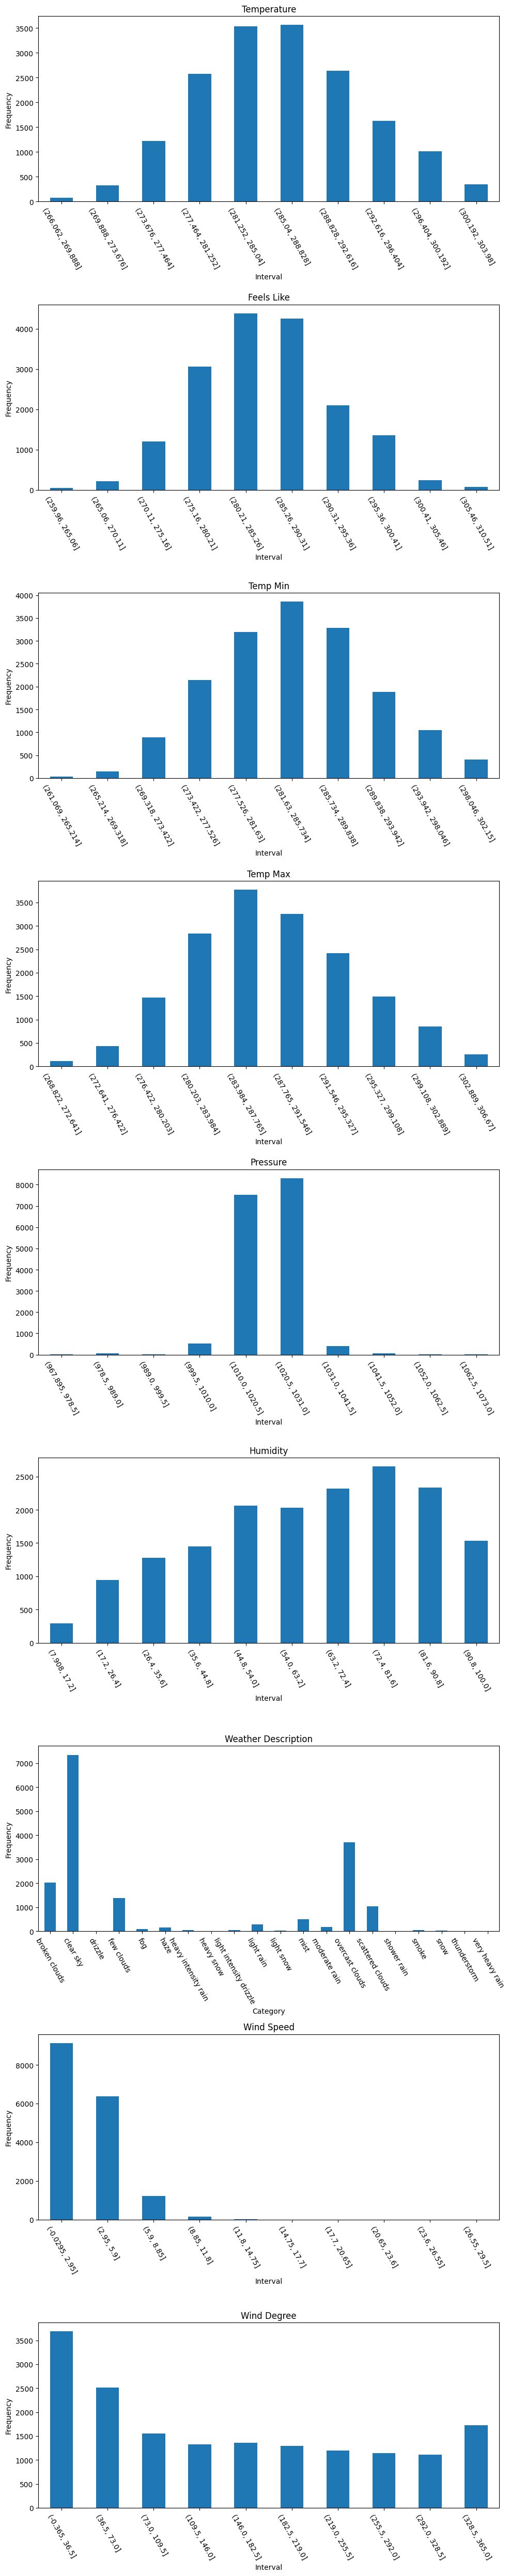

In [7]:
fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(10, 50))

# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()

# Iterate over each column and plot the line chart of frequencies
for i, column in enumerate(df.columns[1:10]):
    ax = axes[i]
    
    # Count the frequency of each interval
    try: 
        intervals = pd.cut(df[column], bins=10)
        interval_counts = intervals.value_counts().sort_index()
        interval_counts.plot(kind='bar', ax=ax)
        ax.set_title(column)
        ax.set_xlabel('Interval')
        ax.set_ylabel('Frequency')
    except:
        category_counts = df[column].value_counts().sort_index()
        category_counts.plot(kind='bar', ax=ax)
        ax.set_title(column)
        ax.set_xlabel('Category')
        ax.set_ylabel('Frequency')
    
    # Plot the line chart
    ax.tick_params(axis='x', rotation=-60)
#     ax.tick_params(axis='both', labelsize=10)
    

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

**Nhận xét:**
- **Phân phối khá đồng đều ở 6 thuộc tính:** Temperature, Feel Like, Temp Min, Temp Max, Humidity, Wind Degree.
- **Phân phối mất cân bằng ở 3 các thuộc tính:** Pressure, Weather Description, Wind Speed. Trong đó Weather Description là cột mục tiêu. Thế nên ta cần:
    - Sử dụng hàm mất mát có trọng số: Các giá trị có tần suất thấp hơn có thể được trọng số cao hơn để đảm bảo rằng mô hình tập trung vào việc dự đoán chính xác các trường hợp hiếm
    - Sử dụng nhiều metrics để đánh giá: không chỉ dựa trên accuracy mà còn sử dụng các metrics như precision, recall, và F1-score để đánh giá hiệu suất của mô hình đối với cả các lớp thiếu sót

## 3.2. Các câu hỏi tự đặt ra <a class="anchor" id="section_3_2"></a>

### Câu hỏi 1: Nhiệt độ cảm nhận ('Feel Like' Temperature) có quan hệ gì so với nhiệt độ thực tế (Actual Temperature)
**Giải đáp được câu hỏi này sẽ**: 
- Mang lại cơ sở để đánh giá tác động biến đổi khí hậu (Chênh lệch càng cao thì cho thấy được có nhiều yếu tố khác gây ra rối loạn cảm quan)
- Đánh giá được mức độ thoải mái, an toàn của khu vực được xét tới trong tập dữ liệu (Nếu chênh lệch không quá nhiều thì chứng tỏ khu vực đó có sự ổn định khí hậu nhất định)

**Cách thức trả lời câu hỏi**: Vẽ biểu đồ thể hiện trực quan mối quan hệ giữa 2 thuộc tính đang xét, đồng thời lập ma trận hệ số tương quan để hiểu rõ mức độ ảnh hưởng giữa 2 thuộc tính ra sao

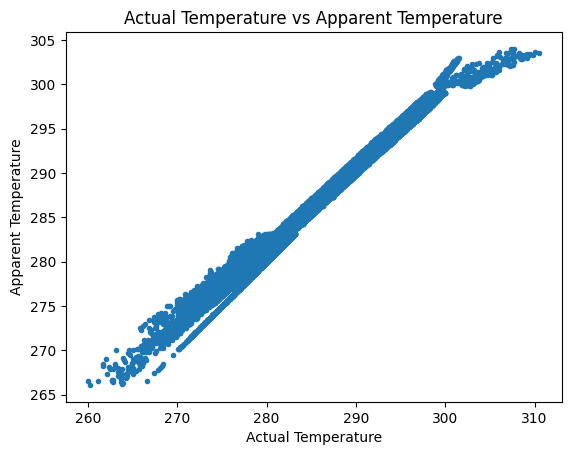

             Feels Like  Temperature
Feels Like     1.000000     0.991474
Temperature    0.991474     1.000000


In [50]:
# Vẽ biểu đồ
heat_df = df.copy()
heat_df = df[['Feels Like','Temperature']]

plt.scatter(heat_df['Feels Like'], heat_df['Temperature'], marker='.')
plt.title('Actual Temperature vs Apparent Temperature')
plt.xlabel('Actual Temperature')
plt.ylabel('Apparent Temperature')
plt.show()

# Lập ma trận hệ số tương quan
print(heat_df.corr())

#### Câu trả lời:
- Từ đồ thị ta nhận thấy các điểm dữ liệu gần như tạo thành 1 đường thẳng trên hệ tọa độ. Điều này cho thấy giữa 2 thuộc tính có mối tương quan tương đối rõ rệt
- Từ ma trận hệ số tương quan, ta thấy được rằng 2 thuộc tính này có mối tương quan rất lớn (Xấp xỉ 0.99). Điều này phù hợp với sự hiểu biết thông thường về mối quan hệ giữa nhiệt độ thực tế và nhiệt độ cảm nhận.

Nhìn chung, giữa nhiệt độ cảm nhận và nhiệt độ thực tế không có sự chênh lệch quá lớn.

### Câu hỏi 2: Nhiệt độ thấp nhất và nhiệt độ cao nhất thay đổi như thế nào trong khoảng thời gian được ghi nhận? 
**Giải đáp được câu hỏi này sẽ**: 
- Mang lại một số hiểu biết nhất định về tình trạng biến đổi khí hậu 
- Đánh giá môi trường sống được ghi nhận trong tập dữ liệu

**Cách thức trả lời câu hỏi**:
- Xác định nhiệt độ thấp nhất và cao nhất được ghi nhận tại bất kỳ thời điểm nào
- Tính hiệu giữa 2 đối tượng trên
- Lập biểu đồ thể hiện sự thay đổi mức chênh lệch giữa nhiệt độ cao nhất và nhiệt độ thấp nhất theo dòng thời gian của tập dữ liệu

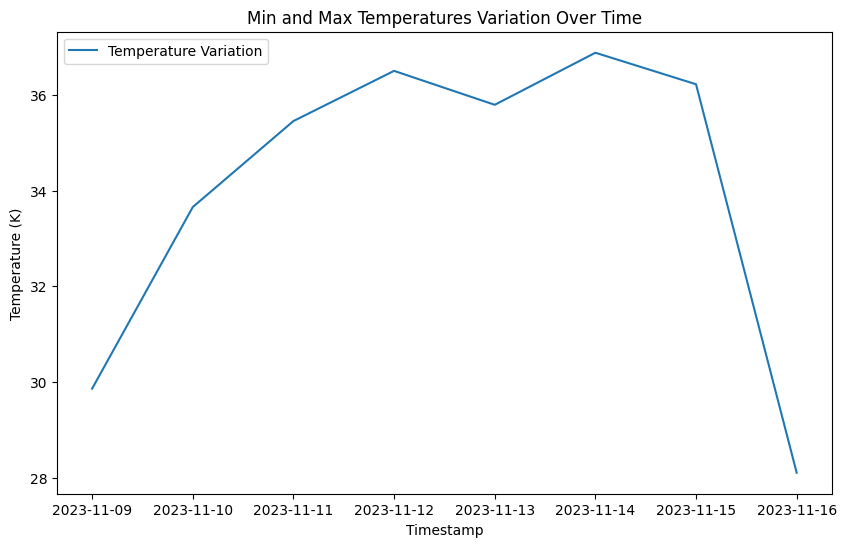

In [59]:
df_copy = df.copy()
df_copy['Timestamp'] = pd.to_datetime(df_copy['Timestamp'], unit='s')

result = df_copy.groupby(df_copy['Timestamp'].dt.date)['Temperature'].agg(['min', 'max'])
temp_variation = result['max'] - result['min']

plt.figure(figsize=(10, 6))
plt.plot(result.index, temp_variation, label='Temperature Variation')
plt.title('Min and Max Temperatures Variation Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (K)')
plt.legend()
plt.show()

#### Câu trả lời:
Theo biểu đồ, sự chênh lệch nhiệt độ cao nhất/thấp nhất theo ngày tại khu vực dao động trong khoảng từ 28 độ K đến 37 độ K trong 7 ngày từ ngày 9 tháng 11 đến ngày 16 tháng 11 năm 2023. Sự chênh lệch nhiệt độ cao nhất là 37 độ K vào ngày 14/11/2023. Sự chênh lệch nhiệt độ thấp nhất là 28 độ K vào ngày 16/11/2023.

Biểu đồ cho thấy sự chênh lệch nhiệt độ cao nhất/thấp nhất có xu hướng tăng dần tới giữa khoảng thời gian và giảm dần cho tới hết.
Dưới đây là một số nhận xét cụ thể về biểu đồ:

- Sự chênh lệch nhiệt độ cao nhất/thấp nhất dao động trong khoảng 10 độ K. Điều này cho thấy sự phân tán của sự chênh lệch nhiệt độ là khá lớn.
- Sự chênh lệch nhiệt độ cao nhất là 37 độ K
- Sự chênh lệch nhiệt độ thấp nhất là 28 độ C

Nhìn chung, biểu đồ cho thấy sự chênh lệch nhiệt độ cao nhất/thấp nhất trong ngày tại khu vực này khá lớn.

### Câu hỏi 3: Kiểu thời tiết nào có khả năng xảy ra cao nhất nếu như nhiệt độ ở ngưỡng cao?

**Giải đáp được câu hỏi này sẽ**: 
- Mang lại một số hiểu biết nhất định cảnh quan thời tiết trong khi nhiệt độ ở ngưỡng cao 
- Mang lại một số ứng dụng nhất định để lên kế hoạch hiệu quả trong ngành nghề nông nghiệp

**Cách thức trả lời câu hỏi**:
- Tìm ra top nhứng khu vực có nhiệt độ trung bình cao nhất
- Từ những khu vực đó, lập ra biểu đồ quạt biểu diễn phân bố cảnh quan thời tiết trong các khu vực đó

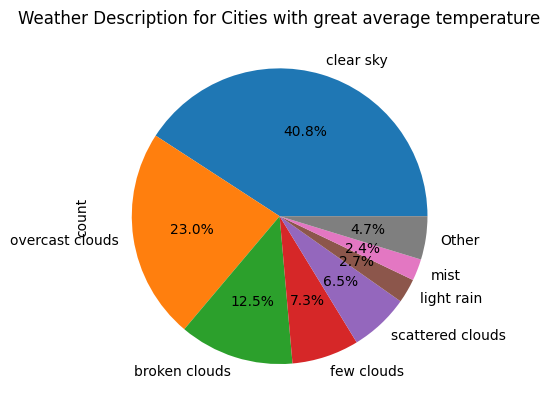

In [58]:
df_copy = df.copy()
df_copy['Timestamp'] = pd.to_datetime(df_copy['Timestamp'], unit='s')

mean_temps = df_copy.groupby('City')['Temperature'].mean().sort_values(ascending=False)
top_cities = mean_temps.head(10).index
city_data = pd.DataFrame()
for city in top_cities:
    city_data = pd.concat([city_data, df_copy[df_copy['City'] == city]])

weather_counts = city_data['Weather Description'].value_counts()
weather_percents = weather_counts / weather_counts.sum() * 100
filtered_weather_counts = weather_counts[weather_percents >= 2]
filtered_weather_counts['Other'] = weather_counts[weather_percents < 2].sum()

filtered_weather_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title(f'Weather Description for Cities with great average temperature')
plt.show()

#### Câu trả lời:
- Dựa vào biểu đồ quạt, ta thấy rằng với nhiệt độ trung bình cao thì cảnh quan thời tiết của khu vực có khả năng rất lớn là 'clear sky' (Trời trong vắt), kế đến là 'overcast clouds' (Mây phủ kín) và 'broken clouds' (Mây vỡ)
- Bên cạnh đó, khi nhiệt độ trung bình của khu vực cao thì các kiểu thời tiết như 'mist' (sương mù), 'light rain' (mưa nhẹ),... có khả năng xảy ra thấp hơn hẳn so với các kiểu thời tiết còn lại

### Câu hỏi 4: Áp suất thay đổi như thế nào qua thời gian?
**Giải đáp được câu hỏi này sẽ**: 
- Hiểu được sự biến đổi của áp suất theo thời gian, từ đó đem lại thêm hiểu biết về biến đổi khí hậu
- Trong một số ngành công nghiệp và ứng dụng kỹ thuật, việc hiểu cách áp suất thay đổi theo thời gian là rất quan trọng. Ví dụ, trong ngành hàng không, việc hiểu rõ về áp suất không khí và cách nó thay đổi theo thời gian là cần thiết để đảm bảo an toàn và hiệu quả của các chuyến bay.

**Cách thức trả lời câu hỏi**:
- Tính áp suất trung bình của theo từng mốc thời gian
- Từ những khu vực đó, lập ra biểu đồ đường biểu diễn sự biến đổi áp suất tương ứng với dòng thời gian

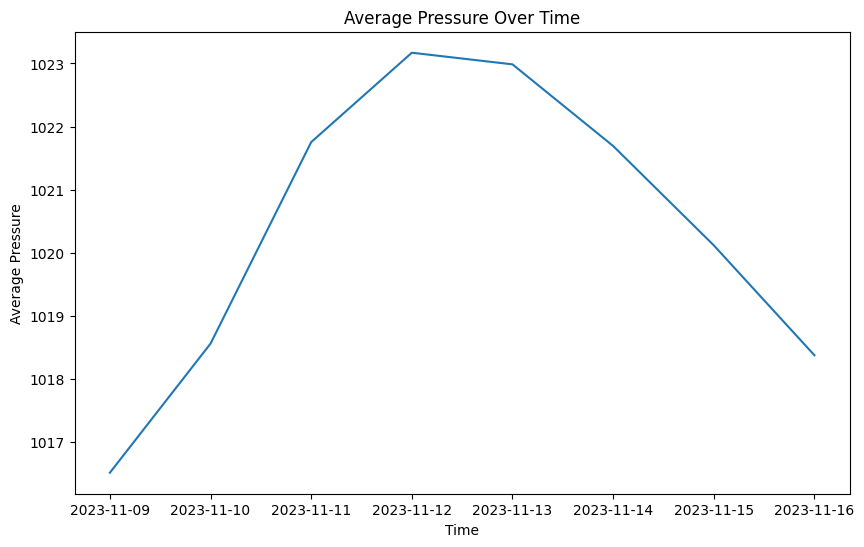

In [60]:
df_copy = df.copy()
df_copy['Timestamp'] = pd.to_datetime(df_copy['Timestamp'], unit='s')

avg_pressure = df_copy.groupby(df_copy['Timestamp'].dt.date)['Pressure'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_pressure.index, avg_pressure.values)
plt.xlabel('Time')
plt.ylabel('Average Pressure')
plt.title('Average Pressure Over Time')
plt.show()

#### Câu trả lời:
Áp suất trung bình dao động trong khoảng từ 1018 hPa đến 1023 hPa trong 7 ngày từ ngày 9 tháng 11 đến ngày 16 tháng 11 năm 2023. Áp suất trung bình cao nhất là 1023 hPa vào ngày 12 tháng 11 và áp suất trung bình thấp nhất là 1016 hPa vào ngày 9 tháng 11.

Dưới đây là một số nhận xét cụ thể về biểu đồ:

- Áp suất trung bình dao động trong khoảng 5 hPa. Điều này cho thấy sự phân tán của áp suất là khá nhỏ.
- Áp suất trung bình cao nhất là 1023 hPa, gần với giá trị trung bình của áp suất tại khu vực.
- Áp suất trung bình thấp nhất là 1016 hPa, thấp hơn giá trị trung bình khoảng 5 hPa.

Nhìn chung, biểu đồ cho thấy áp suất trung bình tại khu vực này tương đối ổn định trong khoảng thời gian được xét.

### Câu hỏi 5: Kiểu thời tiết nào có khả năng xảy ra cao nhất nếu như nhiệt độ ở ngưỡng thấp?

**Giải đáp được câu hỏi này sẽ**:
- Mang lại một số hiểu biết nhất định cảnh quan thời tiết trong khi nhiệt độ ở ngưỡng thấp 
- Mang lại một số ứng dụng nhất định để lên kế hoạch hiệu quả trong ngành nghề nông nghiệp

**Cách thức trả lời câu hỏi**:
- Tìm ra top nhứng khu vực có nhiệt độ trung bình thấp nhất
- Từ những khu vực đó, lập ra biểu đồ quạt biểu diễn phân bố cảnh quan thời tiết trong các khu vực đó

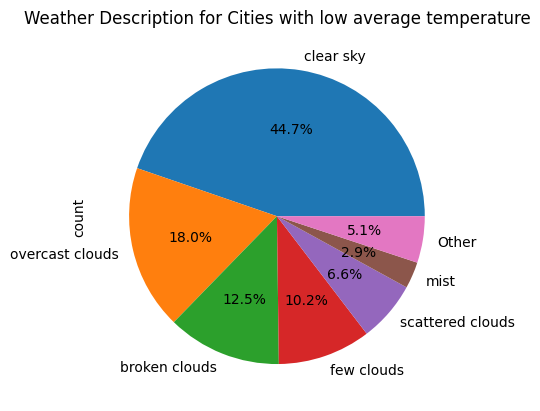

In [62]:
df_copy = df.copy()
df_copy['Timestamp'] = pd.to_datetime(df_copy['Timestamp'], unit='s')

mean_temps = df_copy.groupby('City')['Temperature'].mean().sort_values(ascending=True)
top_cities = mean_temps.head(10).index
city_data = pd.DataFrame()
for city in top_cities:
    city_data = pd.concat([city_data, df_copy[df_copy['City'] == city]])

weather_counts = city_data['Weather Description'].value_counts()
weather_percents = weather_counts / weather_counts.sum() * 100
filtered_weather_counts = weather_counts[weather_percents >= 2]
filtered_weather_counts['Other'] = weather_counts[weather_percents < 2].sum()

filtered_weather_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title(f'Weather Description for Cities with low average temperature')
plt.show()

#### Câu trả lời:
Nếu đối chiếu với biểu đồ thu được từ câu hỏi #3, ta thấy phân bố tương quan của 2 nhóm khu vực đều giống nhau về mặt cảnh quan thời tiết. Ta có thể hiểu rằng việc có nhiệt độ trung bình cao hay thấp nhìn chung sẽ không gây ảnh hưởng lớn tới cảnh quan thời tiết tại khu vực.

# 4. Tiền xử lí dữ liệu

## 4.1. Kiểm tra các các dòng trùng lắp <a class="anchor" id="section_4_1"></a>

In [8]:
# check duplicate row
index = df.index
detectDupSeries = index.duplicated(keep='first')
num_duplicated_rows = detectDupSeries.sum()
if num_duplicated_rows == 0:
    print(f"Your raw data have no duplicated line.!")
else:
    if num_duplicated_rows > 1:
        ext = "lines"
    else:
        ext = "line"
    print(f"Your raw data have {num_duplicated_rows} duplicated " + ext + ". Please de-deduplicate your raw data.!")

Your raw data have no duplicated line.!


**Nhận xét:** Bộ dữ liệu không có các dòng có dữ liệu trùng lặp \
$\rightarrow$ Chùng ta không cần xóa các dòng có dữ liệu trùng lặp

# 4.2. Kiểm tra các thông số của mỗi thuộc tính <a class="anchor" id="section_4_2"></a>

In [26]:
num_col_info_df = df.select_dtypes(exclude='object')
def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)

def median(df):
    return (df.quantile(0.5)).round(1)

def lower_quartile(df):
    return (df.quantile(0.25)).round(1)

def upper_quartile(df):
    return (df.quantile(0.75)).round(1)

num_col_info_df = num_col_info_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max", "mean"])
num_col_info_df

,Timestamp,Temperature,Feels Like,Temp Min,Temp Max,Pressure,Humidity,Wind Speed,Wind Degree
missing_ratio,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min,1.699542e+09,266.100000,260.010000,261.110000,268.860000,968.000000,8.000000,0.000000,0.000000
lower_quartile,1.699693e+09,281.300000,279.800000,279.000000,283.200000,1017.000000,46.000000,1.500000,40.000000
median,1.699844e+09,285.800000,284.700000,283.800000,287.600000,1021.000000,65.000000,2.600000,127.000000
upper_quartile,1.699996e+09,290.400000,289.600000,288.700000,292.600000,1025.000000,80.000000,4.100000,245.000000
max,1.700147e+09,303.980000,310.510000,302.150000,306.670000,1073.000000,100.000000,29.500000,365.000000
mean,1.699844e+09,286.083611,285.015269,283.923432,288.033934,1020.837505,62.215575,2.973333,147.905261


**Nhận xét:**
- **Bộ dữ liệu không có dữ liệu ngoại lai:** Vì các giá trị median của mỗi thuộc tính hơn kém giá trị mean không quá lớn. \
$\rightarrow$ Điều này dẫn đến việc dữ liệu không cần được normalize.
- **Bộ dữ liệu không có missing value:** Vì các thuộc tính đều có giá trị missing_ratio bằng 0. \
$\rightarrow$ Chúng ta cũng không cần bước lấp đầy các missing value.